In [76]:
import pandas as pd
import numpy as np
data = pd.DataFrame({
    "pH": [6.5, 7.2, 5.8, 6.8, 7.0, 6.0],
    "Nitrogen": [0.8, 1.0, 0.6, 0.9, 1.2, 0.5],
    "Phosphorus": [10.2, 12.5, 8.0, 11.0, 13.0, 7.5],
    "Potassium": [15.3, 20.0, 10.0, 16.5, 18.0, 9.8],
    "Carbon": [1.2, 1.8, 0.9, 1.5, 1.7, 0.8],
    "Target": ["Good", "Average", "Poor", "Good", "Good", "Poor"]
})
data

,pH,Nitrogen,Phosphorus,Potassium,Carbon,Target
0,6.5,0.8,10.2,15.3,1.2,Good
1,7.2,1.0,12.5,20.0,1.8,Average
2,5.8,0.6,8.0,10.0,0.9,Poor
3,6.8,0.9,11.0,16.5,1.5,Good
4,7.0,1.2,13.0,18.0,1.7,Good
5,6.0,0.5,7.5,9.8,0.8,Poor


In [78]:
x=data.iloc[:,:-1].values
y=data.iloc[:,0].values

In [89]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
print(x_train)
print(x_test)
target= 'Target'
le = LabelEncoder()
data[target] = le.fit_transform(data[target])


[[ 1.12832963  1.4         1.30526229  1.00130327  1.17953565]
 [-0.19911699 -0.2        -0.11405204  0.12920042 -0.29488391]
 [ 0.59735098  0.2         0.29146634  0.51680169  0.58976782]
 [-1.52656362 -1.4        -1.48267658 -1.64730538 -1.47441956]]
[[-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]


In [100]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=["Target"])
y=data["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [102]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5


In [106]:
print(confusion_matrix(y_test,y_pred))

[[0 1 0]
 [0 0 0]
 [0 0 1]]


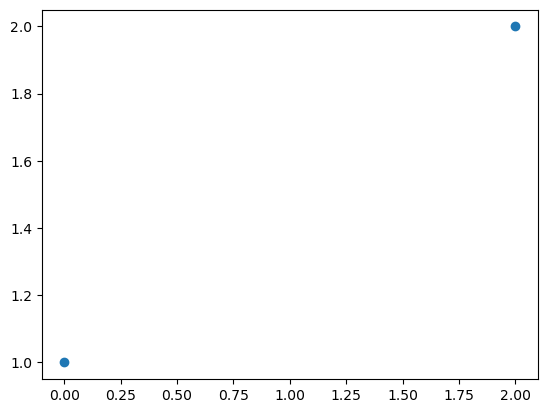

In [108]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()